# Case Study 5

**Assignment: Use Multiple Imputation**

* Use PROC MI to discover the missing values patterns and to decide what MI options to use. (Assume no need for transformations.) **DONE - SEE GRAPHS**
* Use PROC MI to create multiple imputed data sets. **DONE - SEE df_imputed**
* Use PROC REG to analyze the multiple data sets while outputting information to be used in MIANALYZE. **DONE-REGRESSION MODELS ARE FIT. NOT SURE HOW TO DO SOMETHING SIMILAR TO PROC MIANALYZE**
* Use PROC MIANALYZE to summarize the imputed analyses.
* Compare these results to the listwise deletion results.

**Check out this tutorial**
https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

## Must submit a word doc

In [9]:
import pandas as pd
import io

data = io.StringIO("""Auto	MPG	CYLINDERS	SIZE	HP	WEIGHT	ACCEL	ENG_TYPE
Buick Estate Wagon	16.9	8	350	155	4.36	14.9	1
Ford Country Sq. Wagon	15.5	8	351		4.054	14.3	1
Chevy Malibu Wagon	19.2	8	267	125	3.605	15	1
Chrys Lebaron Wagon	18.5	8	360	150	3.94	13	1
Chevette	30	4	98	68	2.155	16.5	0
Toyota Corona	27.5	4	134	95	2.56	14.2	0
Datsun 510	27.2	4	119	97	2.3	14.7	0
Dodge Omni	30.9	4	105	75	2.23	14.5	
Audi 5000	20.3	5	131		2.83	15.9	0
Volvo 240 GL	17	6	163	125	3.14	13.6	0
Saab 99 GLE	21.6		121	115	2.795	15.7	0
Peugeot 694 SL	16.2	6		133	3.41	15.8	0
Buick Century Spec.	20.6		231	105	3.38	15.8	0
Mercury Zephyr	20.8	6	200	85		16.7	0
Dodge Aspen	18.6	6	225	110	3.62	18.7	0
AMC Concord D/L	18.1		258	120	3.41		0
Chevy Caprice Classic	17		305	130		15.4	1
Ford LTD	17.6	8	302	129	3.725		
Mercury Grand Marquis	16.5	8	351	138	3.955	13.2	1
Dodge St Regis	18.2	8	318	135	3.83		1
Ford Mustang 4	26.5	4	140		2.585	14.4	0
Ford Mustang Ghia	21.9	6	171		2.91	16.6	1
Mazda GLC	34.1	4	86	65		15.2	0
Dodge Colt	35.1	4	98	80	1.915	14.4	0
AMC Spirit	27.4	4	121		2.67	15	0
VW Scirocco	31.5	4	89	71	1.99	14.9	0
Honda Accord	29.5	4	98	68		16.6	0
Buick Skylark	28.4	4	151	90	2.67	16	0
Chevy Citation	28.8	6	173	115	2.595	11.3	1
Olds Omega	26.8	6	173	115	2.7	12.9	1
Pontiac Phoenix	33.5	4	151	90	2.556	13.2	0
Plymouth Horizon	34.2	4	105	70	2.2	13.2	0
Datsun 210	31.8	4	85	65	2.02	19.2	
Fiat Strada	37.3	4	91	69	2.13	14.7	0
VW Dasher	30.5	4		78		14.1	0
Datsun 810	22	6		97	2.815	14.5	0
BMW 320i	21.5	4	121	110			0
VW Rabbit	31.9	4	89	71	1.925	14	0""")

df = pd.read_csv(data, sep = '\t')


In [11]:
df.head(10)

,Auto,MPG,CYLINDERS,SIZE,HP,WEIGHT,ACCEL,ENG_TYPE
0,Buick Estate Wagon,16.9,8.0,350.0,155.0,4.360,14.9,1.0
1,Ford Country Sq. Wagon,15.5,8.0,351.0,NaN,4.054,14.3,1.0
2,Chevy Malibu Wagon,19.2,8.0,267.0,125.0,3.605,15.0,1.0
3,Chrys Lebaron Wagon,18.5,8.0,360.0,150.0,3.940,13.0,1.0
4,Chevette,30.0,4.0,98.0,68.0,2.155,16.5,0.0
5,Toyota Corona,27.5,4.0,134.0,95.0,2.560,14.2,0.0
6,Datsun 510,27.2,4.0,119.0,97.0,2.300,14.7,0.0
7,Dodge Omni,30.9,4.0,105.0,75.0,2.230,14.5,NaN
8,Audi 5000,20.3,5.0,131.0,NaN,2.830,15.9,0.0
9,Volvo 240 GL,17.0,6.0,163.0,125.0,3.140,13.6,0.0


## Multiple Imputation


### Graphical exploration of missing data
Followed this guide: https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

In [13]:
import missingno as msno

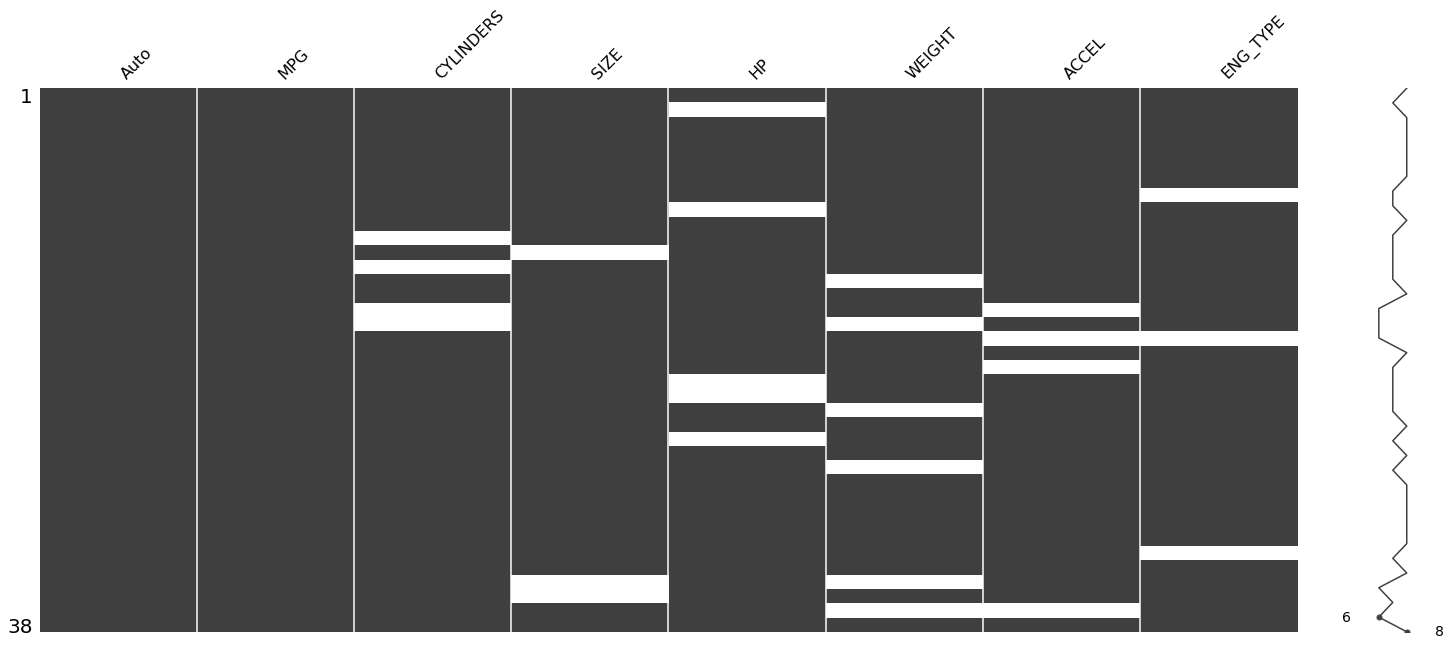

In [19]:
# Displays a visual representation of missing data
# We can quickly see that there is no pattern to the missing data (aka it is missing completely at random)
msno.matrix(df)

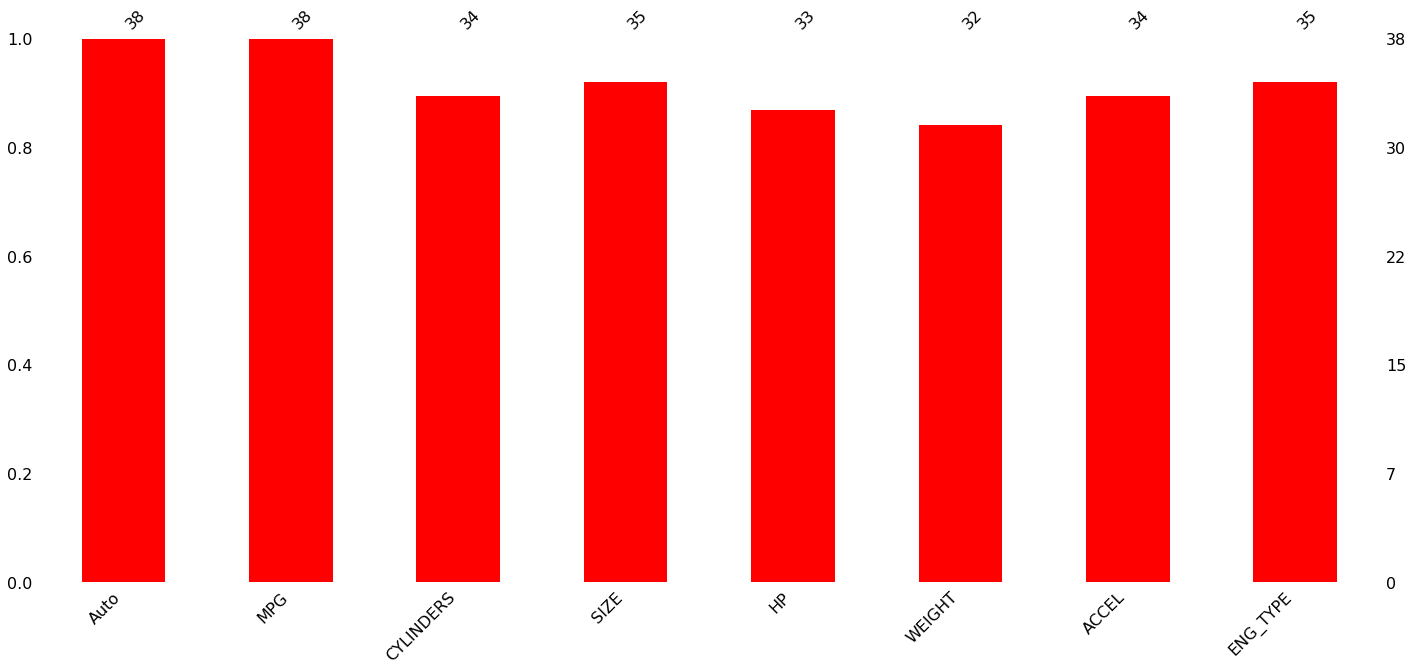

In [21]:
# This bar chart shows us the percentage of complete data on the left, and the number of observations on the right 
# and on top of the bar.
msno.bar(df, color='red')

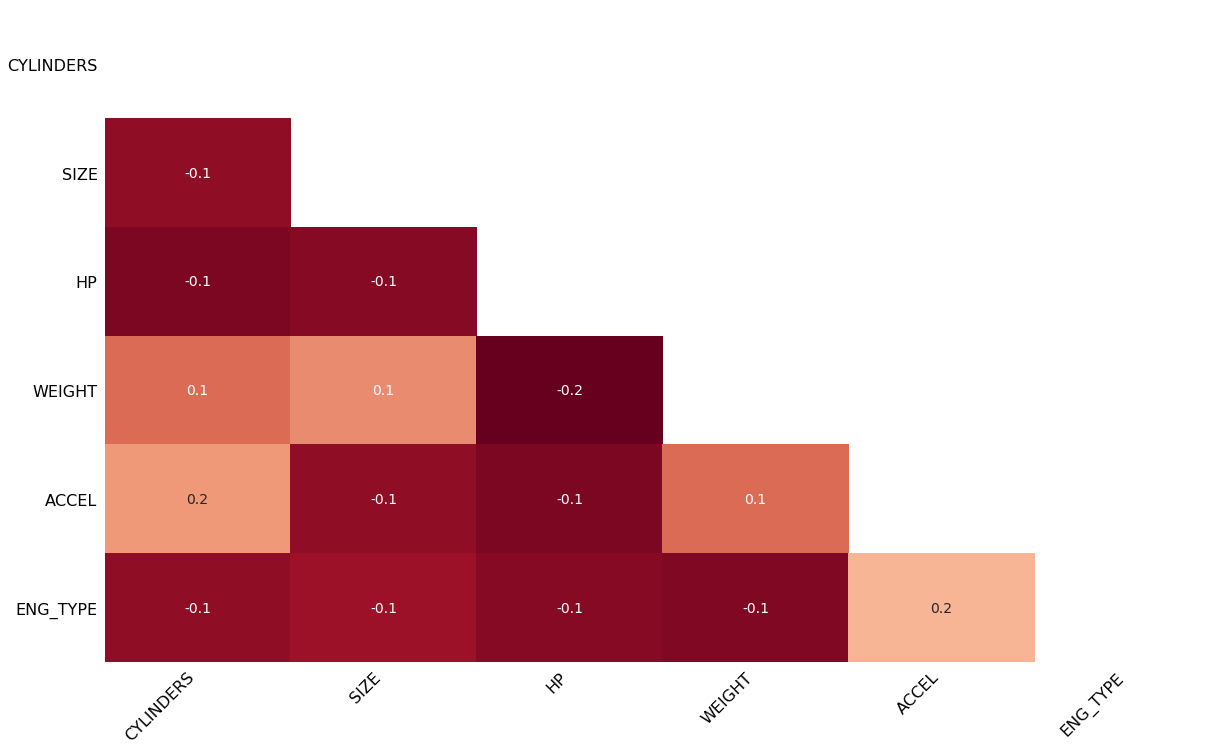

In [22]:
# Next we are going to make a heat map that describes the correaltion between missing data and feature. 
# Features with no missing data are excluded, or if there correlation is close to zero then it will not be displayed. 
# A value of 1 indicates that the two features being compared have the same missing features.
msno.heatmap(df)

### Multiple Imputation using the MICE library (Multiple Imputation by Chained Equations)
Still following: https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

Also check out: https://pypi.org/project/fancyimpute/

In [26]:
import fancyimpute
import numpy as np

In [24]:
dir(fancyimpute)

['BiScaler',
 'IterativeImputer',
 'IterativeSVD',
 'KNN',
 'MatrixFactorization',
 'NuclearNormMinimization',
 'SimilarityWeightedAveraging',
 'SimpleFill',
 'SoftImpute',
 'Solver',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'common',
 'dictionary_helpers',
 'division',
 'iterative_imputer',
 'iterative_svd',
 'keras_models',
 'knn',
 'matrix_factorization',
 'nuclear_norm_minimization',
 'print_function',
 'scaler',
 'similarity_weighted_averaging',
 'simple_fill',
 'soft_impute',
 'solver']

In [36]:
n_imputations = 5
data_iters = []

df_nums = df.loc[:, df.columns != 'Auto']

for i in range(n_imputations):
    imputer = fancyimpute.IterativeImputer(n_iter=5, sample_posterior=True, random_state=i)
    data_iters.append(imputer.fit_transform(df_nums))

In [77]:
num_cols = list(df.columns)
num_cols.remove('Auto')
new_cols = list(df.columns) + ['Iter']
df_imputed = pd.DataFrame(columns=new_cols)

for x in range(n_imputations):
    temp_df = pd.DataFrame(data_iters[x], columns=num_cols)
    temp_df['Iter'] = x
    df_imputed = pd.concat([df_imputed, temp_df])
    
df_imputed
    
    
    

/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,ACCEL,Auto,CYLINDERS,ENG_TYPE,HP,Iter,MPG,SIZE,WEIGHT
0,14.900000,NaN,8.000000,1.000000,155.000000,0,16.9,350.000000,4.360000
1,14.300000,NaN,8.000000,1.000000,130.413598,0,15.5,351.000000,4.054000
2,15.000000,NaN,8.000000,1.000000,125.000000,0,19.2,267.000000,3.605000
3,13.000000,NaN,8.000000,1.000000,150.000000,0,18.5,360.000000,3.940000
4,16.500000,NaN,4.000000,0.000000,68.000000,0,30.0,98.000000,2.155000
5,14.200000,NaN,4.000000,0.000000,95.000000,0,27.5,134.000000,2.560000
6,14.700000,NaN,4.000000,0.000000,97.000000,0,27.2,119.000000,2.300000
7,14.500000,NaN,4.000000,0.805954,75.000000,0,30.9,105.000000,2.230000
8,15.900000,NaN,5.000000,0.000000,82.197713,0,20.3,131.000000,2.830000
9,13.600000,NaN,6.000000,0.000000,125.000000,0,17.0,163.000000,3.140000


['MPG', 'CYLINDERS', 'SIZE', 'HP', 'WEIGHT', 'ACCEL', 'ENG_TYPE']

In [94]:
# comparison of data frames

raw_mean = pd.DataFrame(np.mean(df, 0))
raw_std = pd.DataFrame(np.std(df, 0))

#group by iteration
grouped_iter_means = df_imputed.groupby(['Iter']).mean()
groued_iter_stds = df_imputed.groupby(['Iter']).std()


print(raw_mean.T)
print()
print(raw_std.T)
print()
print(grouped_iter_means)
print(groued_iter_stds)

         MPG  CYLINDERS        SIZE          HP    WEIGHT      ACCEL  ENG_TYPE
0  24.760526   5.323529  180.885714  101.333333  2.905625  14.944118  0.285714

        MPG  CYLINDERS       SIZE         HP    WEIGHT     ACCEL  ENG_TYPE
0  6.460591   1.585237  90.108434  26.704519  0.698022  1.566223  0.451754

          ACCEL  CYLINDERS  ENG_TYPE          HP        MPG        SIZE  \
Iter                                                                      
0     15.013081   5.484460  0.280461  105.327048  24.760526  182.074457   
1     14.983463   5.329665  0.263680  100.752072  24.760526  184.748074   
2     14.792415   5.452905  0.231157  102.830687  24.760526  184.065732   
3     14.896011   5.463648  0.288197  101.528564  24.760526  172.429022   
4     14.711330   5.475448  0.299374  103.182445  24.760526  177.678167   

        WEIGHT  
Iter            
0     2.872292  
1     2.870971  
2     2.941110  
3     2.880102  
4     2.892689  
         ACCEL  CYLINDERS  ENG_TYPE         H

In [109]:
### Trying regression on grouped by object
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols


target_cols = ['CYLINDERS', 'SIZE', 'HP', 'WEIGHT', 'ACCEL', 'ENG_TYPE']

def my_model(df, x_cols, y_cols):
    X = df[x_cols]
    y = df[y_cols]
    model = LinearRegression().fit(X,y)
    return model


grouped_regression = df_imputed.groupby('Iter').apply(my_model, x_cols= target_cols, y_cols=['MPG'])




### Regression Analysis of Imputed Data

In [115]:
grouped_by_iter = df_imputed.groupby('Iter')

for k, g in grouped_by_iter:
    model = ols('MPG ~ CYLINDERS + SIZE + HP + WEIGHT + ACCEL + ENG_TYPE', g)
    results = model.fit()
    print(f'Regression Model for Iteration {k}')
    print("******************************************")
    print(results.summary())
    print()

Regression Model for Iteration 0
******************************************
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     31.06
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           8.40e-12
Time:                        12:24:48   Log-Likelihood:                -87.812
No. Observations:                  38   AIC:                             189.6
Df Residuals:                      31   BIC:                             201.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

### Regression Analysis of Raw Data

In [116]:
raw_model = ols('MPG ~ CYLINDERS + SIZE + HP + WEIGHT + ACCEL + ENG_TYPE', df)
raw_results = raw_model.fit()
print(raw_results.summary())


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     22.39
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           1.46e-05
Time:                        12:27:24   Log-Likelihood:                -36.874
No. Observations:                  18   AIC:                             87.75
Df Residuals:                      11   BIC:                             93.98
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.1477      8.038      8.727      0.0

/home/kyle/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
